In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [3]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [4]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [5]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [16]:
def naive_with_rc(p, t):
    rc = reverseComplement(p)
    if rc == p:
        return naive(p, t)
    return naive(p, t) + naive(rc, t)               

In [18]:
#example 1
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [19]:
# Phi-X genome
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2018-08-24 10:46:38--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 54.230.142.176, 54.230.142.226, 54.230.142.32, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|54.230.142.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2018-08-24 10:46:38 (159 MB/s) - ‘phix.fa’ saved [5528/5528]



In [20]:
phix_genome = readGenome('phix.fa')

In [21]:
occurrences = naive_with_rc('ATTA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 62
# occurrences: 60


In [106]:
virus_genome= readGenome("lambda_virus.fa")  

### How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.

In [44]:
def countPatterns(pattern, genome):
    return len(naive_with_rc(pattern, genome))    

In [108]:
countPatterns("ACCT", virus_genome)

306

In [109]:
countPatterns("TTAA", virus_genome)

195

### What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [69]:
def findOffset(pattern, genome):
    return min(naive_with_rc(pattern, genome))

In [110]:
findOffset("ACTAAGT", virus_genome)

26028

In [111]:
findOffset("AGTCGA", virus_genome)

450

### As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

### For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. We're looking for approximate matches for P itself, not its reverse complement.

In [62]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        mis_match = 0
        for j in range(len(p)):
            if p[j] != t[i + j]:
                mis_match += 1
                if mis_match > 2:
                    break
        if mis_match <= 2:
            occurrences.append(i)
    return occurrences
    

In [65]:
# test function on phix_genome
occurrences = naive_2mm('GATTACA', phix_genome)
print(min(occurrences))
print(len(occurrences))

10
79


### How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?

In [112]:
occurrences = naive_2mm("TTCAAGCC", virus_genome)
len(occurrences)

191

### What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [103]:
def find_offset_2mm(pattern, genome):
    rc = reverseComplement(pattern)
    if rc == pattern:
        return min(naive_2mm(pattern, genome), default = -1)
    return min((naive_2mm(pattern, genome) + (naive_2mm(rc, genome))), default = -1)
    E

In [113]:
find_offset_2mm("AGGAGGTT", virus_genome)

49

### Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question. The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [119]:
sequences, qualities = readFastq("ERR037900_1.first1000.fastq")

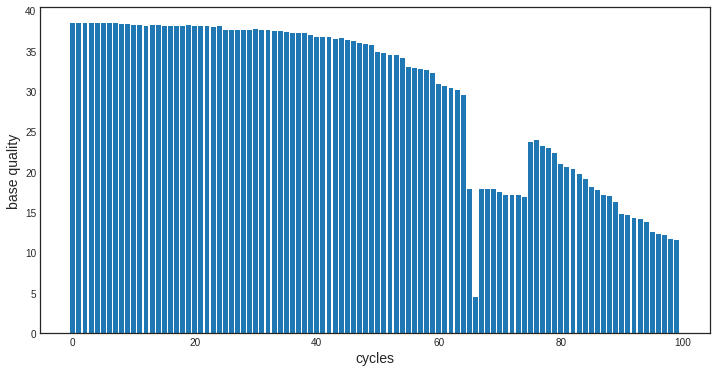

In [134]:
cycles = [0] * 100
for qua in qualities:
    for i in range(100):
        cycles[i] += ord(qua[i]) - 33
for j in range(100):
    cycles[j] /= len(qualities)
    
plt.figure(figsize=(12, 6))
plt.bar(range(100), cycles)
plt.xlabel("cycles", size=14)
plt.ylabel("base quality", size=14);

In [135]:
cycles.index(min(cycles))

66